In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
env = gym.make('MountainCar-v0')
numberOfActions = env.action_space.n

D:\SOFTWARE\Anaconda3\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
D:\SOFTWARE\Anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
actionSpace = [0, 1, 2]
numberOfStates = 20 ** 2
GAMMA = 0.9
ALPHA = 0.05

In [4]:
def createBins():

    bins = np.zeros((2, 20))
    bins[0] = np.linspace(-1.20, 0.6, 20)
    bins[1] = np.linspace(-0.07, 0.07, 20)
    return bins

In [5]:
def assignBins(observation, bins):
    state = np.zeros(2)
    for i in range(2):
        state[i] = np.digitize(observation[i], bins[i])
    return state

In [6]:
def max_dict(d):
    max_v = float('-inf')
    for key, val in d.items():
        if val > max_v:
            max_v = val
            max_key = key
    return max_key, max_v

In [7]:
#initilizing the action value function
def initQ():
  Q = {}

  for i in range(20):
    for j in range(20):
      Q[(i,j)] = {}
      for action in range(env.action_space.n):
        Q[(i,j)][action] = float(0)
  return Q

In [8]:
#initilize a random deterministic target policy
def initTargetPolicy():
  pi = {}

  for i in range(20):
    for j in range(20):
      pi[(i,j)]= np.random.choice(actionSpace)
  return pi

In [9]:
def initReturns():
    returns = {}
    
    for i in range(20):
        for j in range(20):
            returns[(i,j)] = {}
            for action in range(env.action_space.n):
                returns[(i,j)][action] = []
    return returns

In [10]:
def max_dict(d):
    max_v = float('-inf')
    for key, val in d.items():
        if val > max_v:
            max_v = val
            max_key = key
    return max_key, max_v

In [11]:
def nStep_Tree_Backup(env, Q, bins, eps, n):
    obs = env.reset()
    state = tuple(assignBins(obs, bins))
    if np.random.uniform() < eps:
        action = env.action_space.sample()  # epsilon greedy
    else:
        action = max_dict(Q[state])[0]

    count = 0
    complete = 0
    T = np.inf
    t = 0

    states = [state]
    actions = [action]
    rewards = [0]

    for t in itertools.count():

        if t < T:
            obs, reward, done, info = env.step(action)
            count += 1

            state = tuple(assignBins(obs, bins))
            states.append(state)
            rewards.append(reward)
            if done:
                T = t + 1

                if count < 199:
                    complete = 1
                    #print('episode ends at step', t)
            else:
                if np.random.uniform() < eps:
                    action = env.action_space.sample()  # epsilon greedy
                else:
                    action = max_dict(Q[state])[0]
                actions.append(action)

        tau = t - n + 1

        if tau >= 0:
            G = 0
            if t + 1 >= T:
                G = rewards[T]
            else:
                expected_q = 0
                max_action, max_q = max_dict(Q[state])
                greedy_actions = 0
                for i in actionSpace:
                    if Q[state][i] == max_q:
                        greedy_actions += 1

                non_greedy_action_probability = eps / len(actionSpace)
                greedy_action_probability = ((1 - eps) / greedy_actions) + non_greedy_action_probability
                for i in actionSpace:
                    if Q[state][i] == max_q:
                        expected_q += Q[state][i] * greedy_action_probability
                    else:
                        expected_q += Q[state][i] * non_greedy_action_probability
                G = rewards[t + 1] + GAMMA * expected_q

            for k in range(min(t, T - 1), tau + 1, -1):

                state_k = states[k]
                expected_q = 0
                max_action, max_q = max_dict(Q[state_k])
                greedy_actions = 0
                for i in actionSpace:
                    if Q[state_k][i] == max_q:
                        greedy_actions += 1

                non_greedy_action_probability = eps / len(actionSpace)
                greedy_action_probability = ((1 - eps) / greedy_actions) + non_greedy_action_probability
                for i in actionSpace:
                    if Q[state_k][i] == max_q:
                        expected_q += Q[state_k][i] * greedy_action_probability
                    else:
                        expected_q += Q[state_k][i] * non_greedy_action_probability

                if actions[k] == max_action:
                    G = rewards[k] + GAMMA * expected_q + GAMMA * greedy_action_probability * G
                else:
                    G = rewards[k] + GAMMA * expected_q + GAMMA * non_greedy_action_probability * G

            state_action = (states[tau], actions[tau])
            Q[state_action[0]][state_action[1]] += ALPHA * (G - Q[state_action[0]][state_action[1]])
        # print('tau ', tau, '| Q %.2f' %  Q[states[tau]][actions[tau]], actions[tau])
        if tau == T - 1:
            break

    return complete, np.sum(rewards)

In [12]:
def evaluate_and_plot_parameters(cumulative_completion, training_episodes):
    title = f'total episodes vs completed episodes'
    print(f'Evaluated {title}')
    line, = plt.plot(
        np.arange(1, training_episodes + 1),
        cumulative_completion,
        label=title)
    return line

In [13]:
bins = createBins()
Q = initQ()

In [14]:
env = gym.make('MountainCar-v0')
SARSA_completeList = []
completed = 0
eps = 0.05
mem=0
rewards = 0
training_episodes = 5000

i = 100, and completed over past 100 episode 0
i = 200, and completed over past 100 episode 0
i = 300, and completed over past 100 episode 0
i = 400, and completed over past 100 episode 3
i = 500, and completed over past 100 episode 8
i = 600, and completed over past 100 episode 11
i = 700, and completed over past 100 episode 27
i = 800, and completed over past 100 episode 26
i = 900, and completed over past 100 episode 35
i = 1000, and completed over past 100 episode 48
i = 1100, and completed over past 100 episode 55
i = 1200, and completed over past 100 episode 38
i = 1300, and completed over past 100 episode 44
i = 1400, and completed over past 100 episode 43
i = 1500, and completed over past 100 episode 38
i = 1600, and completed over past 100 episode 50
i = 1700, and completed over past 100 episode 35
i = 1800, and completed over past 100 episode 54
i = 1900, and completed over past 100 episode 27
i = 2000, and completed over past 100 episode 78
i = 2100, and completed over past 

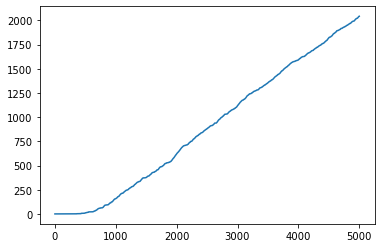

In [15]:
for i in range(training_episodes):
    complete, reward = nStep_Tree_Backup(env, Q, bins, eps,3)
    rewards += reward
    completed += complete
    if i % 100 == 0 and i != 0:
        print("i = " + str(i) + ", and completed over past 100 episode " + str(completed - mem))
        mem = completed
        rewards = 0

    SARSA_completeList.append(completed)

evaluate_and_plot_parameters(SARSA_completeList, training_episodes)
plt.show()


In [16]:
eps = 0
avg = 0
for i in range(100):
    complete,reward = nStep_Tree_Backup(env, Q, bins, eps,3)
    avg += complete
print(avg / 100)

0.73
